In [236]:
import sys
sys.path = ['/Users/sebastian/github/mlxtend/'] + sys.path
from mlxtend.regression import LinearRegression

In [238]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -d -v -p mlxtend

Sebastian Raschka 12/06/2015 

CPython 3.4.3
IPython 3.1.0

mlxtend 0.2.0


# Ordinary Least Squares Linear Regression examples

The linear regression model is defined as

$$ y = w_0 x_0 + w_1x_1 + \dots + w_m x_m \\
 = \sum_{i=1}^{n} w_i x_i = \mathbf{w}^T \mathbf{x},$$

where $\mathbf{w}$ is a vector with the coefficients, $\mathbf{x}$ is the feature vector (exploratory variables), and $y$ is the target value; $w_0$ is the y-axis intercept and $x_0=1$.

<br>
<br>

A function to visualize the linear regression fit and some toy data:

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

In [166]:
X = np.array([ 1, 2, 3, 4, 5])[:, np.newaxis]
y = np.array([ 1, 2, 3, 4, 5])

<br>
<br>

# Normal Equation

Solving the parameters using the closed-form solution (normal equation)

$$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y},$$

and the intercept can be calculated via

$$w_0 = \mu_{y} - \mu_{\hat{y}},$$
where $\mu_{y}$ is the mean of the target variables and $\mu_{\hat{y}}$ is the mean of the predicted target values.


In [167]:
ne_lr = LinearRegression(solver='normal_equation')
ne_lr.fit(X, y)
print('Intercept: %.2f' % ne_lr.w_[0])
print('Slope: %.2f' % ne_lr.w_[1])

Intercept: 0.00
Slope: 1.00


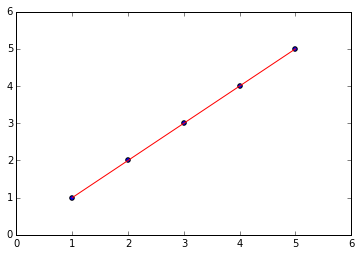

In [168]:
lin_regplot(X, y, ne_lr)

<br>
<br>

# Gradient Descent

Gradient decent implementation optimizing the cost sum of squared error cost function $J(\mathbf{w})$:

$$J(\mathbf{w})  = \frac{1}{2} \sum_{i} (\text{target}^{(i)} - \text{output}^{(i)})^2 \quad \quad \text{output}^{(i)} \in \mathbb{R}$$

And update the weights after each epoch via 

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j}$$ where $\eta$ is the learning rate. The weights are updated after each epoch (pass over the training dataset):

$$\mathbf{w} := \mathbf{w} + \Delta \mathbf{w},$$

where

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = - \eta \sum_i  (t^{(i)} - o^{(i)})(- x^{(i)}_{j}) = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j}$$
(o = output, t = target).

In [187]:
gd_lr = LinearRegression(solver='gd', eta=0.005, epochs=1500, random_seed=0)
gd_lr.fit(X, y)
print('Intercept: %.2f' % gd_lr.w_[0])
print('Slope: %.2f' % gd_lr.w_[1])

Intercept: 0.00
Slope: 1.00


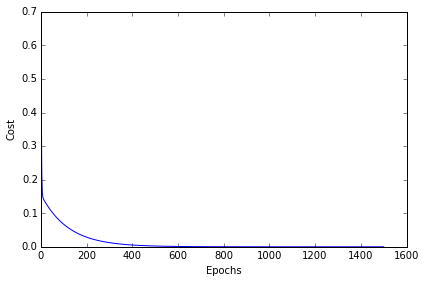

In [185]:
plt.plot(range(1, gd_lr.epochs+1), gd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

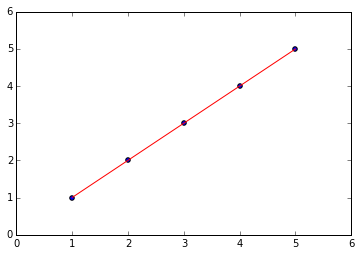

In [141]:
lin_regplot(X, y, gd_lr)

<br>
<br>

# Gradient Descent with Standardized variables

For better convergence, it is typically recommended to standardize the variables prior to using gradient descent for better convergence:
    
$$\mathbf{x}_{j, std} = \frac{\mathbf{x}_j - \mathbf{\mu}_j}{\mathbf{\sigma}_j},$$

where $\mathbf{\mu}$ is the mean of the feature column, and $\mathbf{\sigma}$ is its standard deviation.

In [188]:
X_std = (X - np.mean(X)) / X.std()
y_std = (y - np.mean(y)) / y.std()

In [193]:
gd_lr = LinearRegression(solver='gd', eta=0.1, epochs=10, random_seed=0)
gd_lr.fit(X_std, y_std)
print('Intercept: %.2f' % gd_lr.w_[0])
print('Slope: %.2f' % gd_lr.w_[1])

Intercept: 0.00
Slope: 1.00


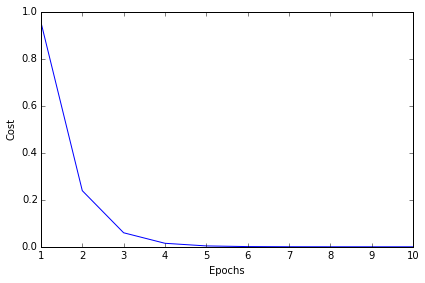

In [194]:
plt.plot(range(1, gd_lr.epochs+1), gd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

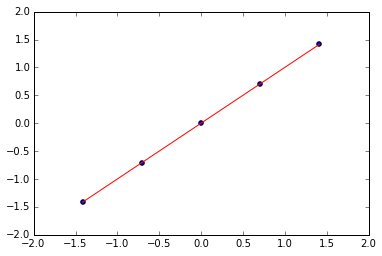

In [195]:
lin_regplot(X_std, y_std, gd_lr)

<br>
<br>

# Stochastic Gradient Descent

In gradient descent the cost function is minimized based on the complete training data set; stochastic gradient descent updates the weights incrementally after each individual training sample.

In [199]:
sgd_lr = LinearRegression(solver='sgd', eta=0.1, epochs=10, random_seed=0)
sgd_lr.fit(X_std, y_std)
print('Intercept: %.2f' % sgd_lr.w_[0])
print('Slope: %.2f' % sgd_lr.w_[1])

Intercept: 0.00
Slope: 1.00


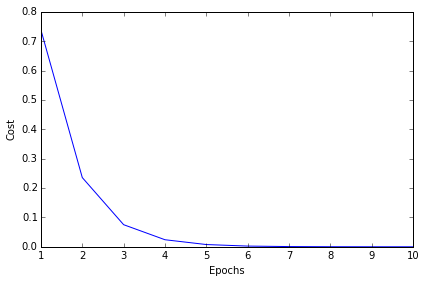

In [200]:
plt.plot(range(1, sgd_lr.epochs+1), sgd_lr.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

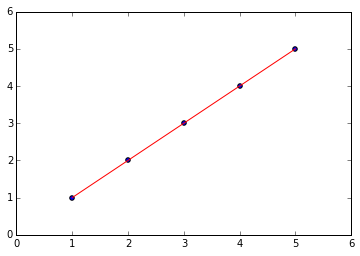

In [201]:
lin_regplot(X, y, sgd_lr)